In [1]:
# 课堂实验 聚类分析 小demo
# 数据集在文件 zscoredata.xls 内

In [2]:
import pandas as pd

filedir = 'zscoredata.xls'
data = pd.read_excel(filedir)

In [3]:
# zscoredata文件内是还未标准化的数据
# 咱们把它z-score
# 我特别去查了一下z-score和之前所做的归一化有什么区别（网上经常能看到“标准化”和“归一化”的说法，而且很多人混用）
# 我研究下来大概是这样的：
'''
这些归一化方法都属于“特征工程”中的方法，大致有4种：
1. 缩放到均值为0，方差为1（ Standardization——StandardScaler() ）
2. 缩放到0和1之间（ Standardization——MinMaxScaler() ）
3. 缩放到-1和1之间（ Standardization——MaxAbsScaler() ）
4. 缩放到0和1之间，保留原始数据的分布（ Normalization——Normalizer() ）

实际上z-score属于第一种，第二种就是常用的Min-Max归一化，就不用太纠结“标准化”和“归一化”了 其实他们都是data preprocessing的一部分，
是为了数据服务的，根据数据特点选择合适的就好

'''
##
'''
input

    data  待归一化的数据DataFrame

return

    retData 归一化完成的数据

'''
def zscore(data):
    meanData = data.mean(axis=0) # axis =0 表示行压缩 对每一列求值 返回一个m*1矩阵
    standardData = data.std(axis=0) 
    retData = (data - meanData)/standardData #数据标准化
    return retData

In [4]:
# 测试一下

zscore(data)

# 没问题再继续 自从上次被kNN搞了之后就养成习惯了 数据分析最重要的就是数据不要错

,L,R,F,M,C
0,1.689882,0.140299,-0.635788,0.068794,-0.337186
1,1.689882,-0.322442,0.852453,0.843848,-0.553613
2,1.681743,-0.487707,-0.210576,0.158569,-1.094680
3,1.534185,-0.785184,0.002030,0.273091,-1.148787
4,0.890167,-0.426559,-0.635788,-0.685170,1.231909
...,...,...,...,...,...
62039,0.590805,-0.938881,1.986351,2.694820,-0.499506
62040,0.578774,-0.086114,0.072898,0.163414,0.366201
62041,0.592928,-0.796753,0.710716,1.607265,-0.932360
62042,0.575235,-0.211715,-0.423182,-0.187230,-0.661826


In [11]:
# 画图
import matplotlib.pyplot as plt
import numpy as np
'''
input:
    
    clusterCenters 聚类中心
    
'''
def plotFigure(clusterCenters):
    plot_data = clusterCenters
    angles = np.linspace(0, 2*np.pi, 5, endpoint=False)
    plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis = 1) #闭合
    angles = np.concatenate((angles, [angles[0]])) # 闭合
    fig = plt.figure()
    #设置为极坐标系
    ax = plt.gca(projection='polar')
    # 5种颜色
    color = ["blue","red","green","yellow","black"]
    # 五个轴的数据标签
    labels = ['ZL','ZR','ZF','ZM','ZC']
    for i in range(len(plot_data)):
        ax.plot(angles, plot_data[i], 'o-', color = color[i], label = u'客户群'+str(i), linewidth=2) #画线
    ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")#绘制同心圆 
    ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")#在 theta 为 angles * 180/np.pi 的位置上做标记 
    # 解决一下中文乱码
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    #有中文出现的情况，需要u'内容'
    plt.legend()# 打上图例

In [14]:
# 导入本次实验的主角 k聚类
from sklearn.cluster import KMeans

def clusterTesting( data):
    # 创建模型
    kmodel = KMeans(n_clusters = 5, n_jobs = 4)
    # 数据预处理 z-score
    zscoredata = zscore(data)
    # 导入z-score过后的数据 训练模型
    kmodel.fit(zscoredata)
    # 查看聚类中心
    print(kmodel.cluster_centers_)
    # 将聚类中心数据用于作图
    plotFigure(kmodel.cluster_centers_)
    # 查看样本类别
    print(kmodel.labels_)
    

[[-7.00882978e-01 -4.15174371e-01 -1.60544248e-01 -1.60223844e-01
  -2.57507364e-01]
 [ 1.16043469e+00 -3.77449866e-01 -8.70077681e-02 -9.49909364e-02
  -1.58599689e-01]
 [ 4.83476474e-01 -7.99417769e-01  2.48236495e+00  2.42356419e+00
   3.09430418e-01]
 [-3.13784358e-01  1.68690565e+00 -5.73831888e-01 -5.36583907e-01
  -1.73065186e-01]
 [ 4.85225957e-02 -2.46873550e-03 -2.32356290e-01 -2.36888467e-01
   2.17178671e+00]]
[1 1 1 ... 1 1 1]


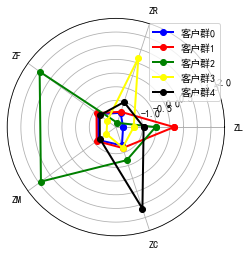

In [15]:
if __name__ == "__main__":
    clusterTesting(data)

In [ ]:
'''
客户群0 ZL最高
客户群1 ZC最高
客户群2 ZF ZM最高
客户群3 ZR最高
客户群4 各项都很低 ZL尤其低
以上的分析就可以得知那些特征在对应用户群上是“优势特征”
'''